# 1. Introduction

This project offers a comprehensive exploration of traditional machine learning techniques for classifying handwritten digit images from the EMNIST dataset. It adopts a holistic approach to model development, integrating theoretical insights, technical practice, and broader considerations such as cost-benefit analysis, reliability, and risk. The goal is to demonstrate how informed, multidimensional strategies can effectively address today’s complex challenges without resorting to sheer computational brute force. By leveraging error analysis, feature importance, and interpretability, this project emphasizes guided decision-making to optimize resource utilization and improve model performance.

The narrative unfolds over seven interconnected chapters, with each chapter building on the results of the preceding one. This structure reinforces the continuity of the project while maintaining modularity and reusability in its codebase. The modular design facilitates systematic benchmarking, visualization, and experimentation, particularly in the context of multiclass classification models. Readers can explore the unified notebook for a seamless experience or engage with individual chapters based on their specific interests.

This project seeks to bridge the gap between theory and practice, demonstrating that they can coexist with business-aware considerations. While deep dives into any single dimension were avoided to maintain balance, the work incorporates essential elements of sound engineering: computational cost efficiency, algorithmic versatility, interpretability, and risk-aware evaluation. Through its communicative and occasionally educational presentation, this project aspires to engage both technical and non-technical audiences, showcasing a thoughtful, resource-efficient approach to machine learning.

## Purpose and Audience

The notebook assumes a foundational understanding of machine learning, reflecting its primary purpose as a portfolio piece rather than a dedicated educational resource. However, the narrative is crafted in a communicative and accessible style, aiming to engage a broad audience. We hope that readers find value in the story it tells.

## Invitation to Collaboration and Feedback

The author warmly invites readers to share their feedback on this project. As the work is still in development, constructive feedback would greatly help in improving its quality and impact. If you see value in contributing to this project or have ideas for its further development, please feel free to reach out to the author. Your ideas and collaboration are most welcome and appreciated. 

## 1.1. Overview of  the EMNIST Dataset

The **Extended MNIST (EMNIST) dataset** is a comprehensive collection of handwritten character images, encompassing both digits and letters. It serves as an extension of the original MNIST dataset, which primarily includes handwritten digits from 0-9. EMNIST was introduced to provide a more extensive benchmark for machine learning and pattern recognition tasks, particularly for handwritten character recognition. The consideably larger size of this dataset compared to the MNIST makes it more challenging for training some models, for instance SVMs, due to the computational complexity of those models. 


EMNIST was collected by the National Institute of Standards and Technology (NIST). This database contains handwritten digits, uppercase letters, and lowercase letters from a diverse group of writers, offering a rich and varied dataset for training and evaluating machine learning models.

#### Dataset Structure

The EMNIST dataset is organized into six distinct subsets, each tailored for specific classification tasks:

1. **EMNIST ByClass**: 814,255 characters spanning 62 unbalanced classes.
2. **EMNIST ByMerge**: 814,255 characters across 47 unbalanced classes.
3. **EMNIST Balanced**: 131,600 characters distributed evenly across 47 classes.
4. **EMNIST Letters**: 145,600 characters covering 26 balanced classes.
5. **EMNIST Digits**: 280,000 characters in 10 balanced classes.
6. **EMNIST MNIST**: 70,000 characters in 10 balanced classes, mirroring the original MNIST dataset.

Each image in the dataset is a 28x28 pixel grayscale image, consistent with the format of the original MNIST dataset, facilitating seamless integration with existing systems and models.

#### Reference and Citation

The EMNIST dataset was introduced in the paper titled **"EMNIST: an extension of MNIST to handwritten letters"** by Gregory Cohen, Saeed Afshar, Jonathan Tapson, and André van Schaik. This paper details the conversion process from the NIST Special Database 19 to the EMNIST format and provides benchmark results for various classification tasks.

You can access the paper here: [EMNIST Paper on arXiv](https://arxiv.org/abs/1702.05373)

#### Why Choosing EMNIST?
The EMNIST dataset is an excellent choice for this project due to several compelling reasons. First, the *handwritten* nature of the digit images *introduces a natural variability and complexity that mirrors real-world data* challenges, making it a valuable benchmark for testing the robustness of machine learning models. Second, with *its size being a few folds larger than the original MNIST dataset*, EMNIST presents a *greater challenge for training models that generalize well*, pushing the limits of traditional machine learning techniques. Additionally, its extended scope, including not just digits but also letters, provides opportunities for experimenting with diverse classification tasks. These characteristics make EMNIST a suitable and challenging dataset, ideal for showcasing the effectiveness of classification algorithms and techniques in this project.

## 1.2. Initial Exploratory Data Visualization and Analysis

Let us first see what data components EMNIST is consisted of: 

In [1]:
import numpy as np
import pandas as pd
import os
from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples

In [2]:
list_datasets()

['digits', 'byclass', 'letters', 'bymerge', 'mnist', 'balanced']

**Convention**: in this notebook, we place code comments above the relevant code line. Hence, when observing a comment, notice that it documents the line following it.

As we described earlier, EMNIST has six sub-datasets. We are interested in the 'digits' dataset. Using the imported methods `extract_training_samples` and `extract_test_samples`, we retrieve the training and testing subsets of the digits datasset within EMNIST as the following demonstrates:

In [3]:
# get the digits training data in the EMNIST
train_digits_images, train_digits_labels = extract_training_samples('digits')

# get the digits testing data
test_digits_images, test_digits_labels = extract_test_samples('digits')

Digits' images in EMNIST are two dimensional 28×28 arrays. For the purpose of training models, we need to flatten both the training and the testing data so that a digit image is a 1-dimensional array with 784 elements/features.

In [4]:
train_digits_flattened = train_digits_images.reshape(train_digits_images.shape[0], -1) 

test_digits_flattened = test_digits_images.reshape(test_digits_images.shape[0], -1)

Next we summarise the distribution of data points across the classes 0-9:

In [5]:
# initialize the DataFrame with index (represent digits)
DF = pd.DataFrame(index=range(10))

# count occurrences and calculate percentages in the train set
counts_train = np.bincount(train_digits_labels, minlength=10)
DF['total digit count train'] = counts_train
DF['percentage in train'] = (counts_train / len(train_digits_labels)) * 100

# count occurrences and calculate percentages in the test set
counts_test = np.bincount(test_digits_labels, minlength=10)
DF['total digit count test'] = counts_test
DF['percentage in test'] = (counts_test / len(test_digits_labels)) * 100

DF

,total digit count train,percentage in train,total digit count test,percentage in test
0,24000,10.0,4000,10.0
1,24000,10.0,4000,10.0
2,24000,10.0,4000,10.0
3,24000,10.0,4000,10.0
4,24000,10.0,4000,10.0
5,24000,10.0,4000,10.0
6,24000,10.0,4000,10.0
7,24000,10.0,4000,10.0
8,24000,10.0,4000,10.0
9,24000,10.0,4000,10.0


This is very interesting! Indeed the EMNIST dataset is completely balanced. As we see above, every digit is represented with equal frequency to other digits. For every digits, there are 24000 handwritten samples in the train set, and 4000 in the train labels, respectively amounting to the 10 percent of the training and testing digits dataset of EMNIST. 

**Stratification**

The fact that the EMNIST digits dataset is already balanced significantly simplifies the preprocessing and training process. Each digit appears with equal frequency, eliminating the need for stratification during data splitting. Stratification is typically required when datasets are imbalanced, meaning some classes are underrepresented compared to others. In such cases, without stratification, random splits may result in training or testing subsets that poorly represent the original class distribution. This can lead to biased training, where the model underperforms for minority classes or fails to generalize well. Since the EMNIST dataset is balanced, the training and testing sets inherently maintain equal representation of all digits, we do not run into the risk of unfairness or unbiased model training and evaluation.

## 1.2.1. Essential Dataset Insights

We devote the rest of the introduction to uncovering some essential charachteristics of the EMNIST. For practical purposes, we select a ***random subset** of the train set of the EMNIST. This random subset consists of 10000 images where every digit has equal representation.   

In [6]:
import numpy as np

def create_balanced_subset_mask(y_train, n_per_digit=1000, random_state=42):
    """
    create a mask for selecting a balanced subset of data with equal representation of each digit.

    args:
    - y_train (ndarray): Array of training labels.
    - n_per_digit (int): Number of samples to select per digit.
    - random_state (int): Seed for reproducibility.

    returns:
    - mask (ndarray): Boolean mask for selecting the subset.
    """
    np.random.seed(random_state)
    unique_digits = np.unique(y_train)
    selected_indices = []

    for digit in unique_digits:
        digit_indices = np.where(y_train == digit)[0]
        sampled_indices = np.random.choice(digit_indices, size=n_per_digit, replace=False)
        selected_indices.extend(sampled_indices)
    
    mask = np.zeros(len(y_train), dtype=bool)
    mask[selected_indices] = True
    
    return mask

subset_mask = create_balanced_subset_mask(train_digits_labels, n_per_digit=1000)

# apply mask to select the subset
subset_X_train = train_digits_flattened[subset_mask]
subset_y_train = train_digits_labels[subset_mask]

# confirm the subset is balanced
unique, counts = np.unique(subset_y_train, return_counts=True)
print("Subset class distribution:", dict(zip(unique, counts)))

Subset class distribution: {np.uint8(0): np.int64(1000), np.uint8(1): np.int64(1000), np.uint8(2): np.int64(1000), np.uint8(3): np.int64(1000), np.uint8(4): np.int64(1000), np.uint8(5): np.int64(1000), np.uint8(6): np.int64(1000), np.uint8(7): np.int64(1000), np.uint8(8): np.int64(1000), np.uint8(9): np.int64(1000)}


### Visualization of Random Samples

The code below visualizes 100 randomly selected images from the trainign set to provide an intuitive understanding of the images' structure and variability. We notice a diversity in handwriting styles, stroke thickness, and occasional distortions which are characteristics of real-world variability. Take a close look at these images—do you notice the variation in how the digits are written?

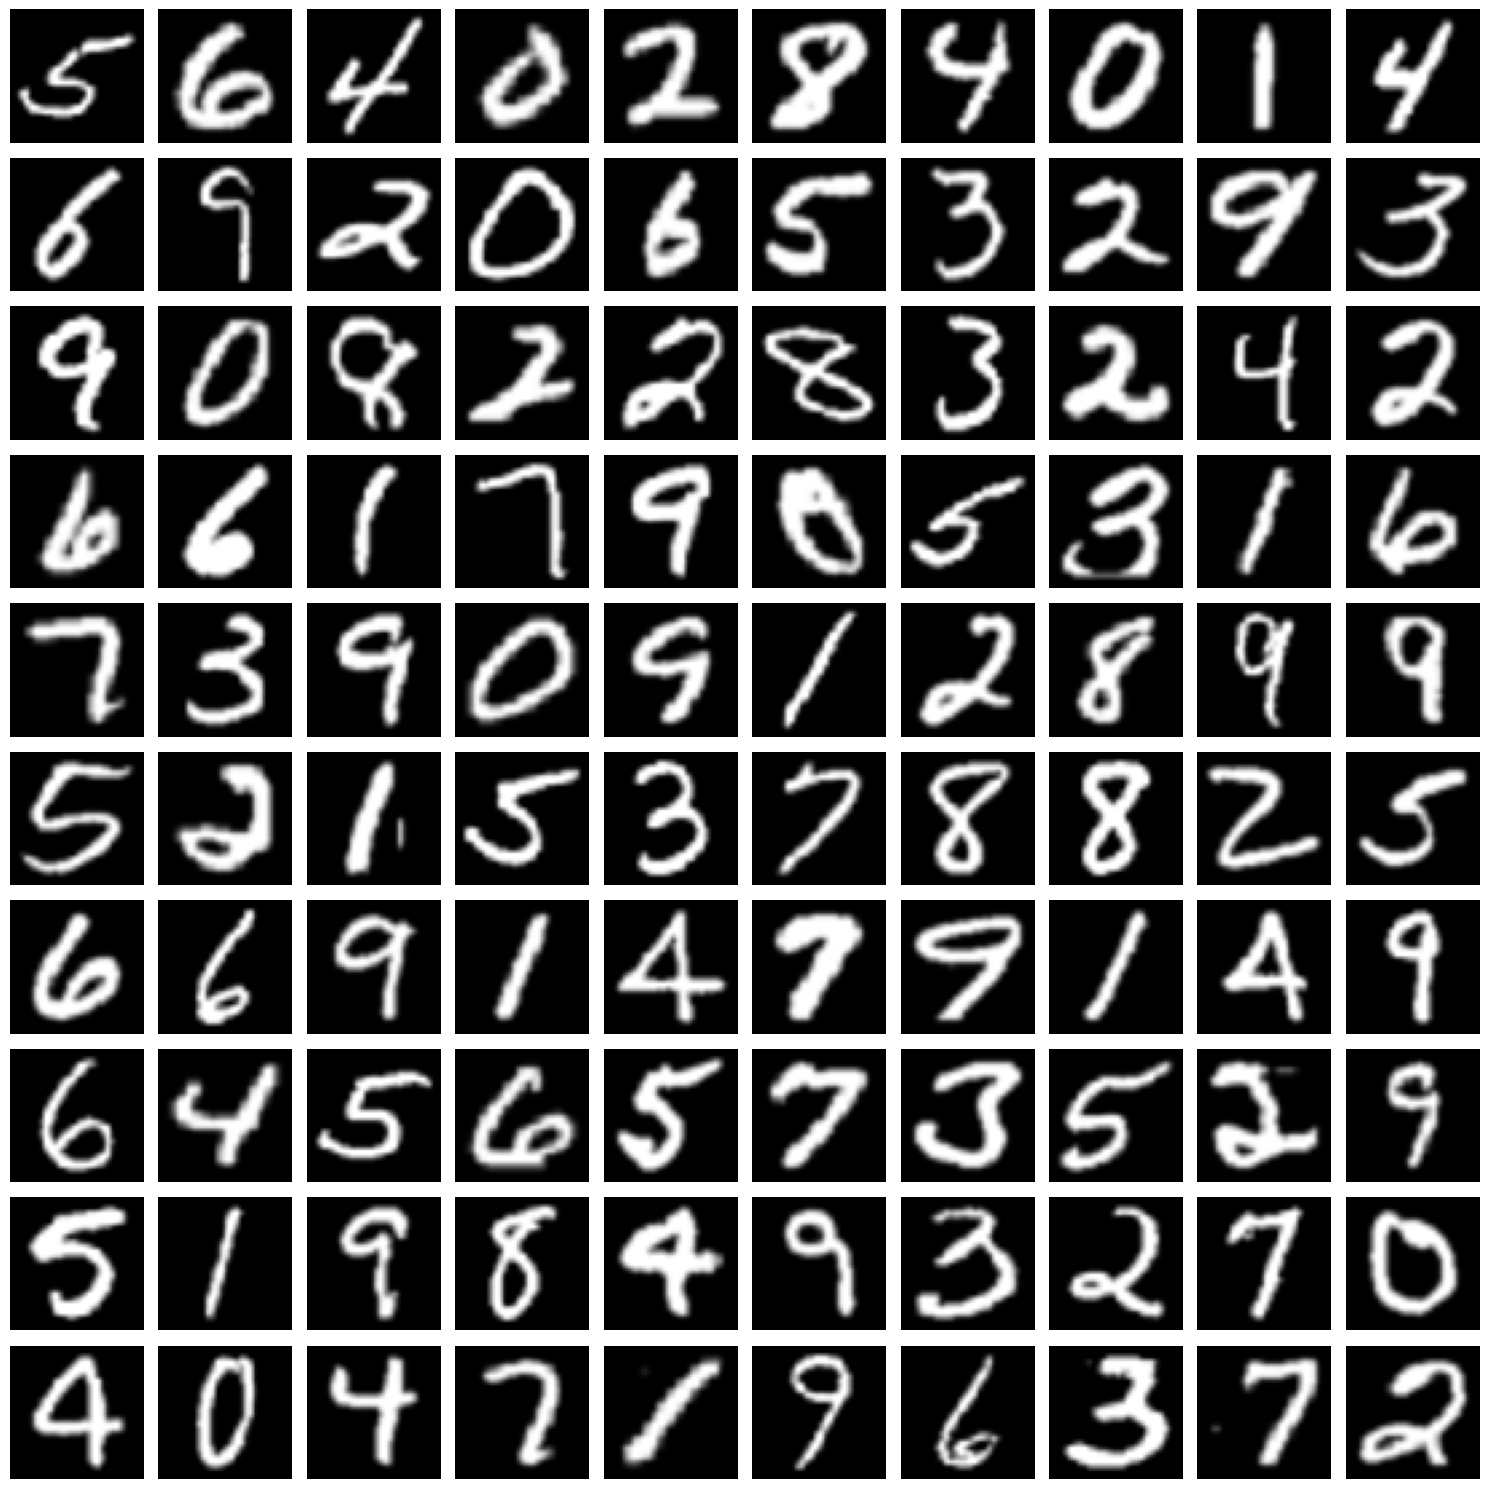

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# total number of images to display
num_images = 100

# number of images per row
images_per_row = 10
rows = num_images // images_per_row

# adjust figsize as preferred
fig, axes = plt.subplots(rows, images_per_row, figsize=(15, 15))

# randomly sample images from the dataset
sampled_images = random.sample(list(subset_X_train), num_images)

for i, img in enumerate(sampled_images):
    img = img.reshape(28, 28)
    pil_img = Image.fromarray(img)
    resized_img = pil_img.resize((50, 50))
    
    # determine row and column index
    row = i // images_per_row
    col = i % images_per_row
    axes[row, col].imshow(resized_img, cmap='gray')
    # Hide axes for a cleaner look
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

**Challenges of Image Variability**

This variability poses a significant challenge for classification models, as they must learn to generalize across differences such as rotation, scaling, or distortion. For example, some digits in the dataset, like "1," are slightly rotated, while others, like "8" and "6," exhibit distortions. Such inconsistencies are particularly problematic for linear models that rely on L1 or L2 metrics, where even minor transformations can drastically alter distance calculations, leading to misclassifications.

**Ways To Handle Input Image Variability**

- ***Data augmentation*** is one of the many techniques for tackling this kind of variability in input image data that negatively impacts model training. Chapter 11 discusses how data augmentation works (in the context of dealing with imbalanced datasets). 

- Using ***Feature Engineering*** we can extract rotation- or scale-invariant features (e.g., histograms of gradients, Fourier descriptors). These features make the models more robust to transformations.

- We can ***Preprocess*** input data by applying transformations like deskewing, normalization, and centering to standardize the images. This reduces variability caused by rotation or shifts in the digit's position within the frame.

- We can tackle it through careful ***Model Selection*** instead. Tree-based models (e.g., Random Forests, Gradient Boosted Trees) are less sensitive to raw distance metrics.
 
- ***Ensemble Techniques*** combine multiple models, each trained on slightly varied or augmented versions of the data. This approach averages out biases due to rotation or scale sensitivity.

- We can use ***Dimensionality Reduction*** techniques like PCA or t-SNE to reduce the impact of noise or redundant variations which create a more compact and robust feature space.

- We can optimize ***Distance Metric*** istead of the above. For distance-based models (e.g., k-NN), consider advanced metrics like Mahalanobis distance or learned similarity metrics that adapt to the dataset's characteristics.

As with most things in machine learning, there is no one-size-fits-all solution. Each of the techniques mentioned above comes with its own set of advantages and trade-offs. In particularly, the computational cost, scalability, and resource limitations discourages use of some techniques for mid to large size datasets. For instance, in the case of the EMNIST dataset, the significant computational overhead associated with techniques like PCA or Nearest Neighbor models makes them less practical to apply.

### Exploring Engineered Features: Mean Pixel Intensity, Non-Zero Proportion, and Center of Mass

Handwritten digit classification can benefit greatly from engineered features that encapsulate meaningful patterns and characteristics of the images. Among the features that can provide insights into the dataset, we consider **mean pixel intensity**, **non-zero proportion**, and **center of mass**. These features are particularly valuable because they incorporate domain-specific insights into the feature set, complementing the raw pixel intensities. Mean pixel intensity offers global information about image brightness, non-zero proportion captures spatial density, and center of mass reflects the geometry of the digit. Together, they form a set of interpretable and impactful features that enhance classification performance.

The **mean pixel intensity** measures the average brightness of an image by summing all pixel values and dividing by the total number of pixels. This metric reflects the overall "density" of an image. For instance, digits like "1" with sparse structures often have lower mean intensities, while digits like "8," which cover more of the image, tend to have higher intensities. By quantifying how "bright" an image is, mean pixel intensity provides a way to separate digits based on their structural density, which is particularly useful when differentiating sparse digits from dense ones.

The **non-zero proportion** represents the fraction of pixels in an image that are active (non-zero) compared to the total pixels. This feature captures the spatial density of meaningful content within an image. Sparse digits, such as "1" or "7," typically have lower non-zero proportions compared to denser digits like "0" or "8." Additionally, this metric can provide robustness against variations in handwriting thickness or stroke density, which can differ significantly across samples.

The **center of mass** identifies the average spatial location of active pixels, weighted by their intensity. This feature introduces a geometric perspective by analyzing where the "weight" of the digit lies within the image. For example, digits like "6" and "9" often have similar shapes but differ in their center of mass due to alignment differences. Similarly, handwritten variability—such as shifts or tilts in how digits are drawn—can be captured by this feature. By providing a sense of spatial positioning, the center of mass helps distinguish digits with geometric similarities but positional differences.

In [8]:
def compute_pixel_statistics(images, labels):
    """
    compute mean pixel intensity, non-zero proportion, and center of mass for each digit class.

    args:
    - images (ndarray): Array of image data (flattened images with shape [num_samples, num_pixels]).
    - labels (ndarray): Array of labels corresponding to the images.

    returns:
    - pd.DataFrame: DataFrame with statistics for each digit class.
    """
    stats = {
        "Digit": [],
        "Mean Intensity": [],
        "Non-Zero Proportion": [],
        "Center of Mass (x)": [],
        "Center of Mass (y)": []
    }

    image_shape = int(np.sqrt(images.shape[1]))  # Assuming square images

    for digit in np.unique(labels):
        digit_indices = np.where(labels == digit)[0]
        digit_images = images[digit_indices]
        
        # Reshape images to their original dimensions
        digit_images_reshaped = digit_images.reshape(-1, image_shape, image_shape)
        
        # Compute mean pixel intensity
        mean_intensity = digit_images.mean(axis=1).mean()
        
        # Compute non-zero proportion
        non_zero_proportion = (digit_images > 0).mean()
        
        # Compute center of mass
        y_coords, x_coords = np.meshgrid(range(image_shape), range(image_shape), indexing='ij')
        total_intensity = digit_images_reshaped.sum(axis=(1, 2))
        x_center_of_mass = (digit_images_reshaped * x_coords).sum(axis=(1, 2)) / total_intensity
        y_center_of_mass = (digit_images_reshaped * y_coords).sum(axis=(1, 2)) / total_intensity
        
        stats["Digit"].append(digit)
        stats["Mean Intensity"].append(mean_intensity)
        stats["Non-Zero Proportion"].append(non_zero_proportion)
        stats["Center of Mass (x)"].append(x_center_of_mass.mean())
        stats["Center of Mass (y)"].append(y_center_of_mass.mean())

    return pd.DataFrame(stats)

pixel_stats_df = compute_pixel_statistics(subset_X_train, subset_y_train)

pixel_stats_df

,Digit,Mean Intensity,Non-Zero Proportion,Center of Mass (x),Center of Mass (y)
0,0,55.897791,0.414716,13.574288,13.867933
1,1,24.783526,0.196556,13.644846,13.644365
2,2,50.571622,0.373816,13.471563,14.618933
3,3,48.156380,0.365716,14.877348,13.539161
4,4,41.041469,0.307378,13.567576,13.043627
5,5,43.253477,0.332175,12.751923,13.375744
6,6,46.505542,0.339495,12.963911,15.934512
7,7,38.410241,0.292351,14.480961,10.892808
8,8,50.633267,0.367286,12.972185,13.159839
9,9,42.509540,0.310659,13.984442,11.440853


### Insights from Engineered Features for Tree-Based Models

The analysis of engineered features—mean pixel intensity, non-zero proportion, and center of mass—reveals key insights into the structure of the EMNIST dataset and its implications for tree-based models:

1. **Uniformity in Non-Zero Proportion:** For most digits, the non-zero proportion of pixel intensities is around one-third. This suggests that a significant portion of the pixel data may be redundant or uninformative, allowing tree-based models to achieve strong performance even when features are randomly sampled.

2. **Feature Independence:** The engineered features capture global or geometric properties of the digits, such as density and shape, which are less sensitive to fine-grained pixel details. This makes them particularly useful for tree-based models, which rely on feature splits to define separable regions in the feature space.

3. **Robustness of Tree-Based Models:** Tree-based models inherently randomize feature selection at each split, making them robust to noise and irrelevant features. The observed uniformity and simplicity of these engineered features suggest that such models can efficiently utilize subsets of features to capture meaningful patterns.

4. **Potential for Dimensionality Reduction:** The engineered features encapsulate much of the discriminative power in a compact representation. This implies that models trained on these features could perform comparably to those trained on full pixel data while being computationally more efficient.

### Ideas to Explore Based on Observations from Engineered Features

The observations drawn from the engineered features—mean pixel intensity, non-zero proportion, and center of mass—open up several intriguing possibilities for exploration:

1. **Feature-Driven Model Training:**  Can models trained solely on the engineered features match or even exceed the performance of those trained on raw pixel data? By reducing dimensionality while retaining discriminative power, these features might enable computationally efficient models.

2. **Utility of Randomized Feature Subsets:**  How do tree-based models (e.g., Random Forest or XGBoost), which inherently randomize feature splits, perform when trained on subsets of pixel features?  Does the inclusion of engineered features enhance performance compared to random subsets of the raw pixel data?

3. **Feature Importance and Interpretability:** To what extent do tree-based models prioritize the engineered features during training? Analyzing feature importance can reveal whether these features play a dominant role in decision-making.  Can we achieve better interpretability by training simpler models (e.g., linear models) on the engineered features while maintaining competitive performance?

4. **Comparison Across Models:** How do different models (e.g., linear classifiers vs. tree-based models) leverage these features? Do these engineered features reduce the reliance on large-scale hyperparameter optimization, especially for simpler models?

5. **Impact on Multiclass Classification:**  Can these engineered features reduce the computational cost of training multiclass classifiers?  How well do they generalize to more complex tasks like separating multiple digits simultaneously?

6. **Framework for Feature Engineering:**  These engineered features provide a strong foundation for further exploration. Can additional features, such as those derived from transformations (e.g., edge detection, gradient features), complement these to boost performance?  How does the combination of engineered features and dimensionality reduction techniques (e.g., PCA) affect the overall classification process?

We will revisit these ideas in **Part I**, particularly in **Chapter 5**, where we extensively explore feature selection, feature importance, and feature engineering. The insights gained will inform our approach to designing a performant multiclass classifier in **Chapter 6**. Furthermore, these engineered features will play a crucial role in **Part II**, helping us build computationally efficient k-NN models for the EMNIST dataset, despite its resource-intensive nature and large size.

## 1.2.2. Variance and Class-Level Pixel Statistics

The features discussed in this section—**variance across digits, mean images, variance images, and pairwise differences between average images**—provide crucial insights into the structure of the dataset, and they can significantly impact/inform the classification process as we describe below.

### Feature Variance Across Digits
To understand the variability in pixel intensities across different digits, we computed the variance of pixel intensities for each digit class. A bar chart was plotted to visualize the variance, revealing differences in complexity and diversity of digit representations. Digits with higher variance may exhibit more diverse handwriting styles. This makes them potentially harder to classify.

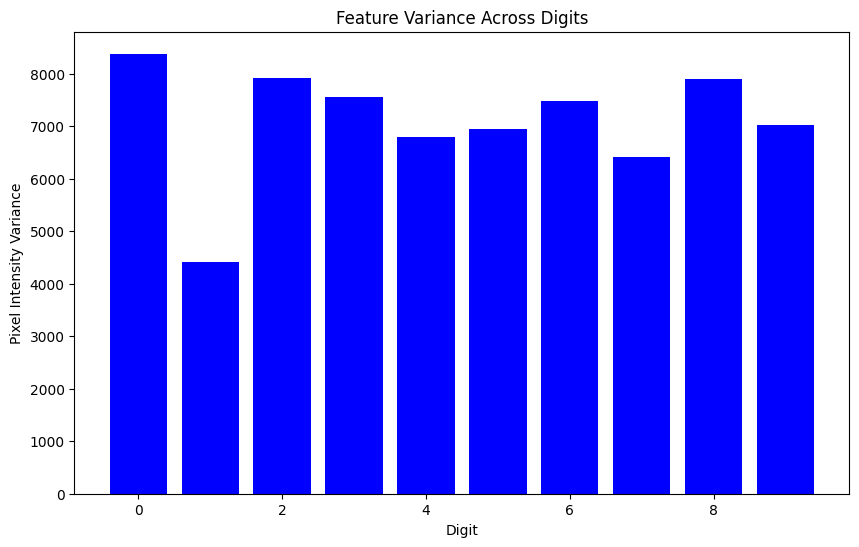

In [10]:
unique_digits = list(range(10))

# compute feature variance across digits
feature_variance = []
for digit in unique_digits:
    digit_data = subset_X_train[subset_y_train == digit]
    feature_variance.append(digit_data.var())

# plot feature variance across digits
plt.figure(figsize=(10, 6))
plt.bar(unique_digits, feature_variance, color="blue")
plt.xlabel("Digit")
plt.ylabel("Pixel Intensity Variance")
plt.title("Feature Variance Across Digits")
plt.show()

### Mean and Variance Images per Digit

We visualize mean and variance of the images for each digit to highlight their shared and unique characteristics. **Mean Images** capture the average pixel intensity for each digit class. This sohws common patterns and structures across samples.

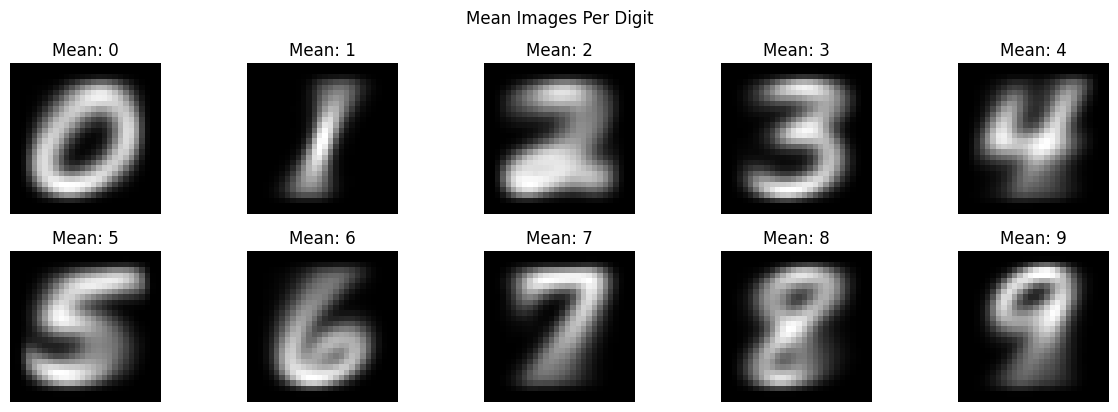

In [11]:
# compute and visualize mean images per digit
mean_images = []

plt.figure(figsize=(12, 8))
for i, digit in enumerate(unique_digits):
    digit_data = subset_X_train[subset_y_train == digit]
    mean_img = digit_data.mean(axis=0).reshape(28, 28)
    mean_images.append(mean_img)
    
    # Plot mean image
    plt.subplot(4, 5, i + 1)
    plt.imshow(mean_img, cmap="gray")
    plt.title(f"Mean: {digit}")
    plt.axis("off")

plt.suptitle("Mean Images Per Digit")
plt.tight_layout()
plt.show()

**Variance** of the images display regions with high variability where strokes and styles differ the most across samples. Low-variance pixels (e.g., background pixels) contribute little to distinguishing classes and may be ignored by some models or feature selection methods. For dimensionality reduction techniques like PCA, low-variance features are often removed as noise.

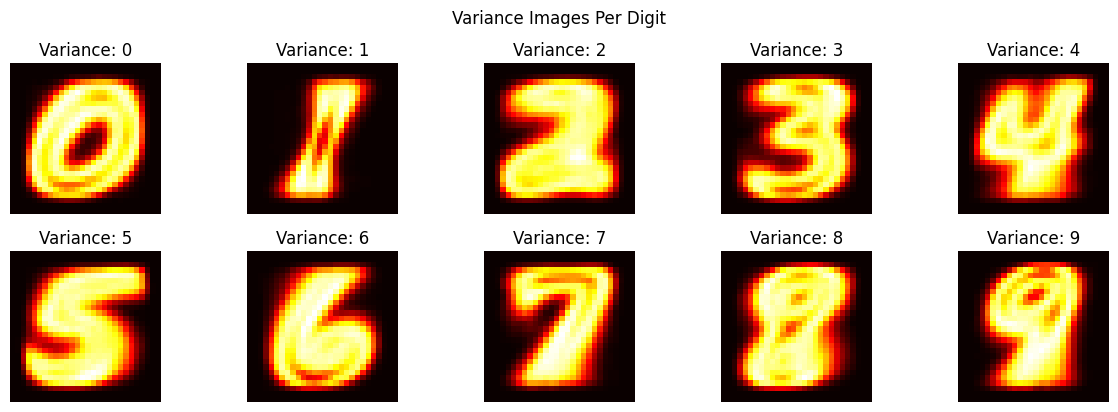

In [12]:
# compute and visualize variance images per digit
variance_images = []

plt.figure(figsize=(12, 8))
for i, digit in enumerate(unique_digits):
    digit_data = subset_X_train[subset_y_train == digit]
    var_img = digit_data.var(axis=0).reshape(28, 28)
    variance_images.append(var_img)
    
    # plot variance image
    plt.subplot(4, 5, i + 1)
    plt.imshow(var_img, cmap="hot")
    plt.title(f"Variance: {digit}")
    plt.axis("off")

plt.suptitle("Variance Images Per Digit")
plt.tight_layout()
plt.show()

As observed in the variance visualizations and corroborated by our earlier findings on non-zero proportion measurements, a significant number of features (e.g., pixels) are non-informative, with their values consistently zero. These "dark pixels," often corresponding to the background, provide little to no discriminative power for classification. Additionally, the visualizations highlight notable similarities between certain digits. For instance, digits 4 and 9 exhibit significant overlap in their variance patterns, suggesting potential confusion between these classes. This is especially true for linear models, where distance metrics such as $L_1$ or $L_2$ norms might incorrectly score these digits, leading to misclassification. Similarly, digits 5 and 6, as well as digits 6 and 8, share structural patterns that could contribute to classification errors. Finally, the resemblance between digits 3 and 8, particularly in their loops and curves, stands out as another source of potential misclassification.

### Visualizing Differences in Average Images

Pairwise differences between the average images of selected digits (e.g., "8" vs. "3", "5" vs. "6") were computed and visualized as heatmaps. These heatmaps reveal two key aspects: (a) regions that differentiate one digit class from another, and (b) regions where the classes exhibit the most similarity (e.g., shared strokes between "8" and "3"). These areas are particularly prone to misclassification.

For example, in the case of "3" and "8," the lighter regions on the heatmap highlight areas where the two digits differ most significantly. The lower-right portion of the image corresponds to the bottom curve of the digit "3," which distinguishes it from "8" (as shown in the average digit images above). Conversely, the left half of the heatmap emphasizes the loops of the digit "8," setting it apart from "3." These regions represent features that are most critical for the correct classification of "3" versus "8."

Identifying class-specific features—such as the loops in "8" and the curves in "3"—provides valuable guidance for feature extraction and augmentation techniques aimed at improving class separability. For instance, augmenting data to emphasize such distinguishing features can help create more distinct representations for challenging digit pairs. Additionally, the insights gained can inform adjustments to decision boundaries in linear classifiers, such as logistic regression or linear SVMs, to better separate these overlapping regions in the feature space.

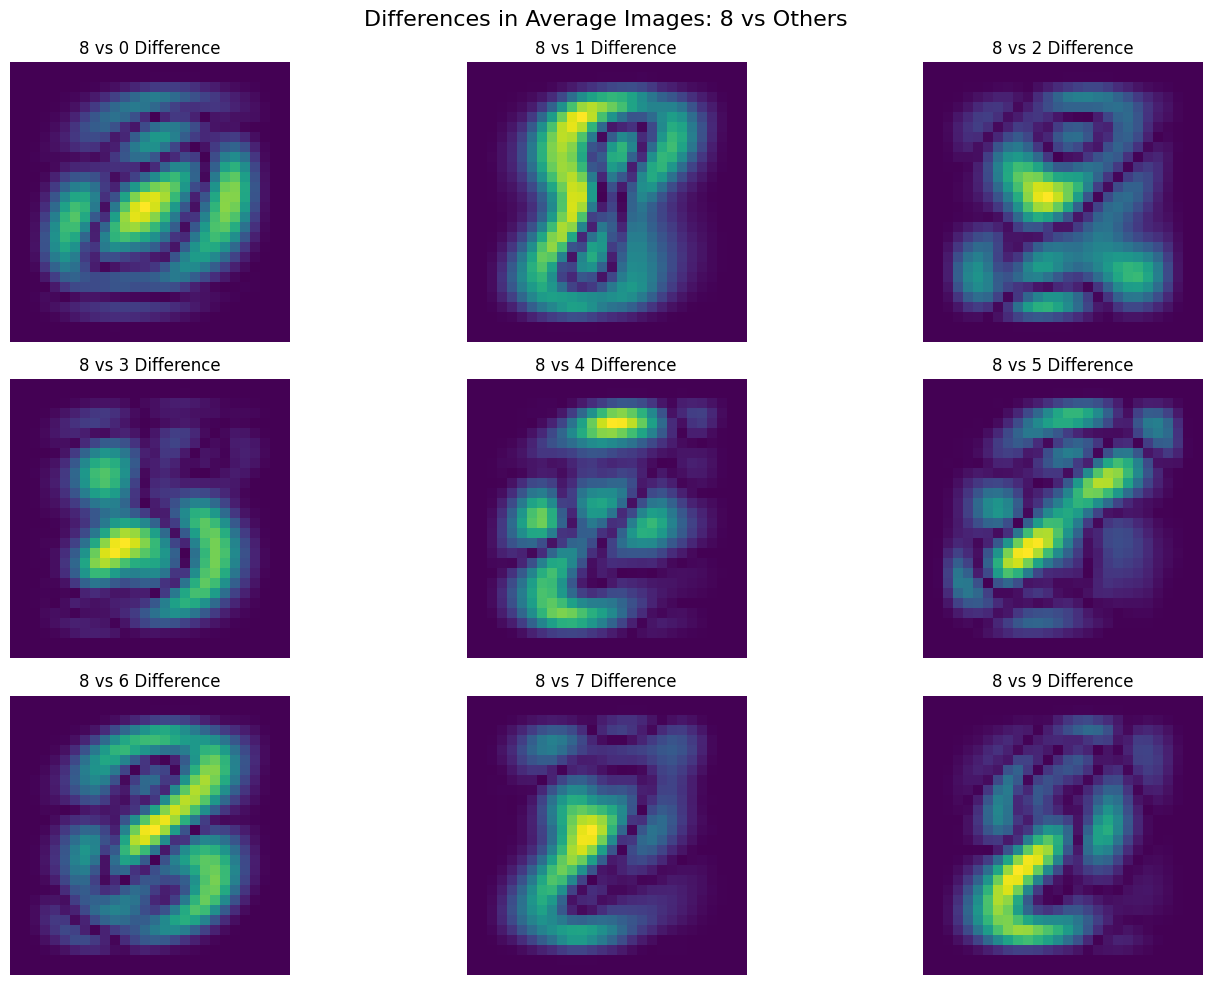

In [13]:
# visualize differences between digit 8 and every other digit
other_digits = [digit for digit in unique_digits if digit != 8]

plt.figure(figsize=(15, 10))
for i, digit in enumerate(other_digits):
    mean_diff = abs(mean_images[unique_digits.index(8)] -
                    mean_images[unique_digits.index(digit)])
    plt.subplot(3, 3, i + 1)  # Adjust the grid size as needed
    plt.imshow(mean_diff, cmap="viridis")
    plt.title(f"8 vs {digit} Difference")
    plt.axis("off")

plt.suptitle("Differences in Average Images: 8 vs Others", fontsize=16)
plt.tight_layout()
plt.show()